In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [12]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


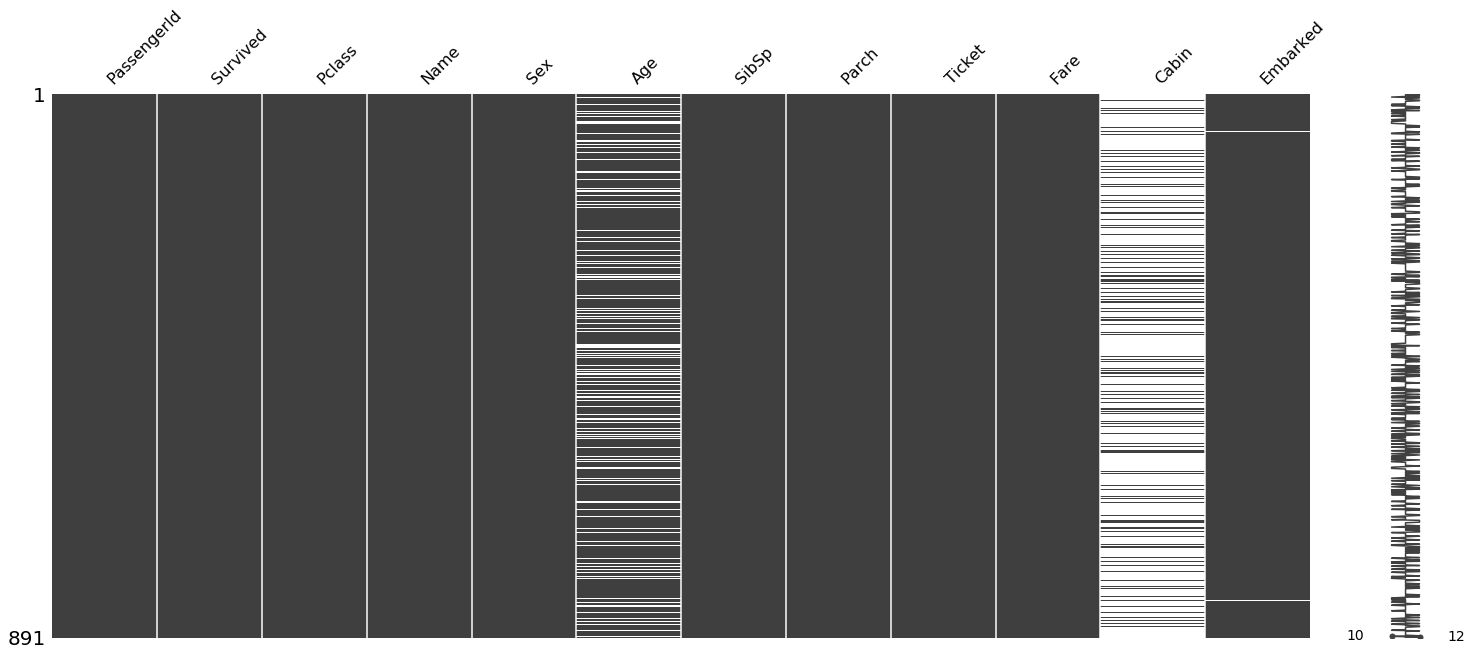

In [4]:
msno.matrix(titanic_train)

In [6]:
# lab_sex = preprocessing.LabelEncoder()
# lab_sex.fit(titanic_train['Sex'].unique())
# titanic_train['Sex'] = lab_sex.transform(titanic_train['Sex'])

# lab_embarked = preprocessing.LabelEncoder()
# lab_embarked.fit(titanic_train['Embarked'].unique())
# titanic_train['Embarked'] = lab_embarked.transform(titanic_train['Embarked'])

# titanic_train.head()

In [15]:
predict_cabin = pd.DataFrame(
    {"Ticket 0" : titanic_train['Ticket'].str.split(" ", expand=True)[0]
     , "Ticket 1" : titanic_train['Ticket'].str.split(" ", expand=True)[1]
     , "Ticket 2" : titanic_train['Ticket'].str.split(" ", expand=True)[2]
     , "Cabin" : titanic_train['Cabin']
     , "Cabin Catageories" : titanic_train['Cabin'].str[0]
     , "Embarked" : titanic_train['Embarked'].str[0]
     , "Fare" : titanic_train['Fare']
     , "PClass" : titanic_train['Pclass']
     , "SibSp" : titanic_train['SibSp']
     , "Parch" : titanic_train['Parch']
     , "Avg Price Per Person" : titanic_train['Fare']/(titanic_train['Parch'] + titanic_train['SibSp']+1)
     , "TPerson" : (titanic_train['Parch'] + titanic_train['SibSp']+1)
    })

In [16]:
predict_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticket 0              891 non-null    object 
 1   Ticket 1              226 non-null    object 
 2   Ticket 2              13 non-null     object 
 3   Cabin                 204 non-null    object 
 4   Cabin Catageories     204 non-null    object 
 5   Embarked              889 non-null    object 
 6   Fare                  891 non-null    float64
 7   PClass                891 non-null    int64  
 8   SibSp                 891 non-null    int64  
 9   Parch                 891 non-null    int64  
 10  Avg Price Per Person  891 non-null    float64
 11  TPerson               891 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [17]:
predict_cabin_not_null = predict_cabin.dropna(subset=['Cabin', 'Embarked'])
predict_cabin_not_null['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [18]:
lab_cabin_catageories = preprocessing.LabelEncoder()
lab_cabin_catageories.fit(predict_cabin_not_null['Cabin Catageories'].unique())
predict_cabin_not_null['Cabin Catageories'] = lab_cabin_catageories.transform(predict_cabin_not_null['Cabin Catageories'])

lab_embarked = preprocessing.LabelEncoder()
lab_embarked.fit(predict_cabin_not_null['Embarked'].unique())
predict_cabin_not_null['Embarked'] = lab_embarked.transform(predict_cabin_not_null['Embarked'])

predict_cabin_not_null.head()

C:\Users\Panji Satrio Hutomo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Panji Satrio Hutomo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Ticket 0,Ticket 1,Ticket 2,Cabin,Cabin Catageories,Embarked,Fare,PClass,SibSp,Parch,Avg Price Per Person,TPerson
1,PC,17599,None,C85,2,0,71.2833,1,1,0,35.641650,2
3,113803,None,None,C123,2,2,53.1000,1,1,0,26.550000,2
6,17463,None,None,E46,4,2,51.8625,1,0,0,51.862500,1
10,PP,9549,None,G6,6,2,16.7000,3,1,1,5.566667,3
11,113783,None,None,C103,2,2,26.5500,1,0,0,26.550000,1


In [19]:
alg = LogisticRegression(random_state = 3)
scores = cross_val_score(alg
                         , predict_cabin_not_null[['Avg Price Per Person'
                                                   , 'Embarked'
                                                   , 'TPerson'
                                                  ]]
                         , predict_cabin_not_null['Cabin Catageories'], cv=2
                        )
scores

C:\Users\Panji Satrio Hutomo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Panji Satrio Hutomo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Panji Satrio Hutomo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

array([0.20792079, 0.25742574])

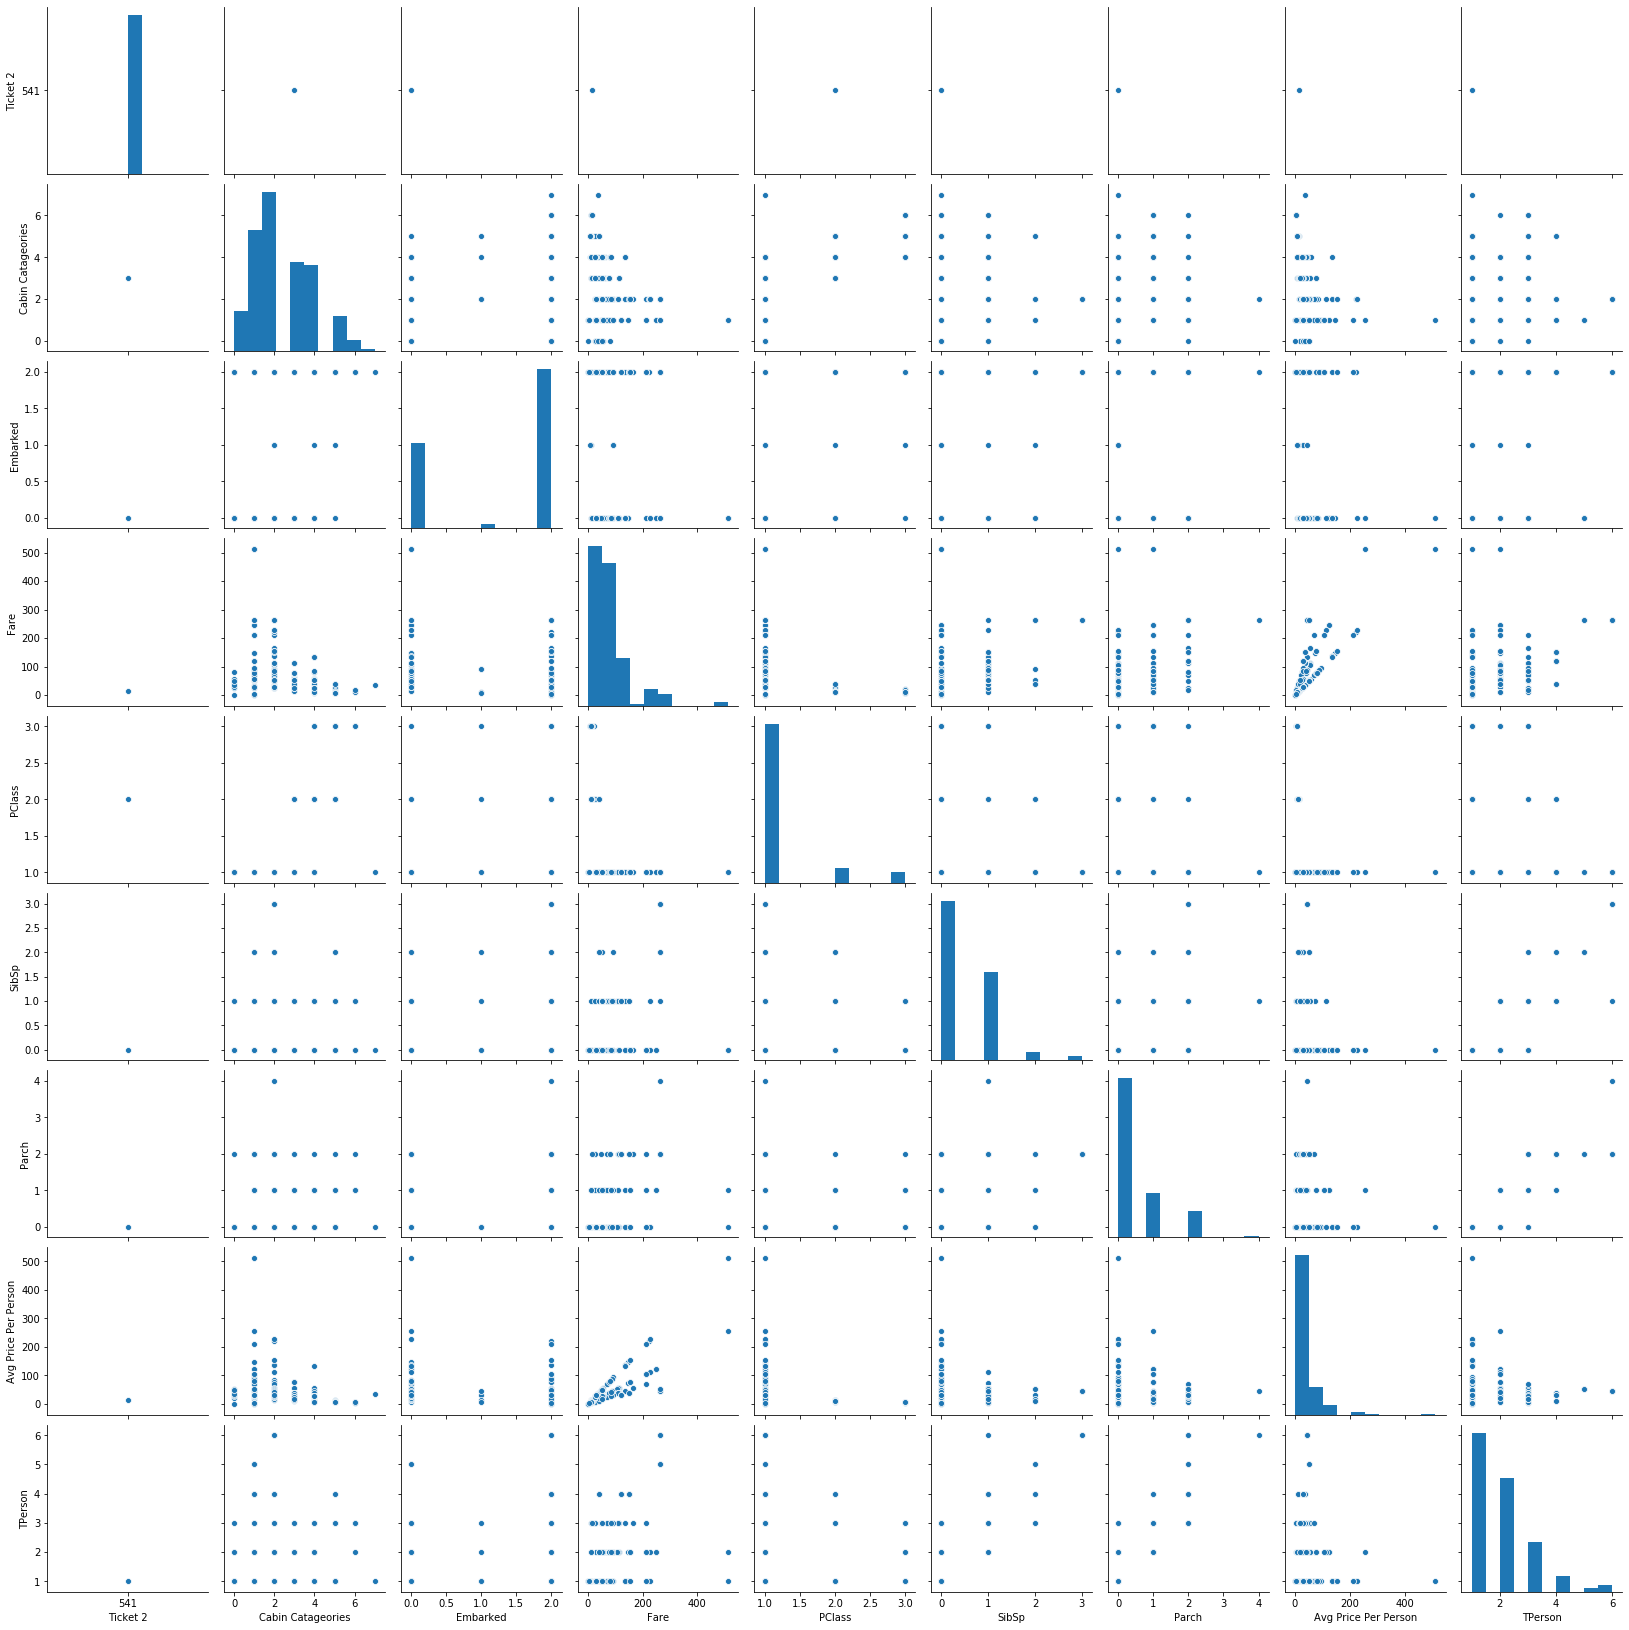

In [21]:
sns.pairplot(predict_cabin_not_null)

In [22]:
predict_cabin_not_null.corr()

,Cabin Catageories,Embarked,Fare,PClass,SibSp,Parch,Avg Price Per Person,TPerson
Cabin Catageories,1.000000,0.258378,-0.299331,0.597775,0.029191,0.017803,-0.271056,0.028993
Embarked,0.258378,1.000000,-0.239213,0.170303,0.002228,0.061455,-0.245270,0.042794
Fare,-0.299331,-0.239213,1.000000,-0.311740,0.291777,0.384970,0.770750,0.429595
PClass,0.597775,0.170303,-0.311740,1.000000,-0.086972,0.056288,-0.264995,-0.012555
SibSp,0.029191,0.002228,0.291777,-0.086972,1.000000,0.262348,-0.132343,0.758548
Parch,0.017803,0.061455,0.384970,0.056288,0.262348,1.000000,-0.079488,0.827796
Avg Price Per Person,-0.271056,-0.245270,0.770750,-0.264995,-0.132343,-0.079488,1.000000,-0.130619
TPerson,0.028993,0.042794,0.429595,-0.012555,0.758548,0.827796,-0.130619,1.000000
